In [ ]:
import numpy as np
import os
from pathlib import Path

import matplotlib.pylab as plt
from tensorflow.python.keras.applications import vgg16
from tensorflow.python.keras.applications.vgg16 import preprocess_input
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.python.keras.callbacks import ModelCheckpoint
from tensorflow.python.keras import layers, models, Model, optimizers
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score ,plot_confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow.keras.models import load_model
import numpy as np
from tensorflow.python.keras.applications import vgg16
from tensorflow.python.keras.applications import vgg19



# Prédire le carcinome canalaire invasif


## Définition :


Le carcinome canalaire infiltrant (IDC) est - avec environ 80 % des cas - l'un des types de cancer du sein les plus courants. Il est malveillant et capable de former des métastases, ce qui le rend particulièrement dangereux.

## Qu'entend-on par carcinome canalaire invasif (IDC)? <a class="anchor" id="intro"></a>

<a title="Mikael Häggström, M.D. - Author info - Reusing images [CC BY (https://creativecommons.org/licenses/by/2.5)]" href="https://commons.wikimedia.org/wiki/File:Lobules_and_ducts_of_the_breast.jpg"><img width="309" alt="Lobules and ducts of the breast" style="float:left; margin:0px 15px 15px 15px" src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/47/Lobules_and_ducts_of_the_breast.jpg/256px-Lobules_and_ducts_of_the_breast.jpg"></a>

Cette illustration créée par [Mikael Häggström](https://commons.wikimedia.org/wiki/File:Lobules_and_ducts_of_the_breast.jpg) montre l'anatomie d'un sein sain. On peut voir les lobules, les glandes qui peuvent produire du lait qui passe à travers les canaux lactifères. Le carcinome canalaire commence à se développer dans les canaux tandis que le carcinome lobulaire a son origine dans les lobules. Le carcinome invasif est capable de quitter son compartiment tissulaire initial et peut former des métastases.

# Data

## L'importation des données

In [ ]:
# Les données
data = Path('/content/drive/MyDrive/DL/data_cancer')

# Les données de train
train = Path('/content/drive/MyDrive/DL/data_cancer/train')

# Les données de validation
validation = Path('/content/drive/MyDrive/DL/data_cancer/validation')

# Les données de teste
test= Path('/content/drive/MyDrive/DL/data_cancer/test')


PosixPath('/content/drive/MyDrive/DL/data_cancer/train')

## Visualisation




## Healthy patches (IDC-)


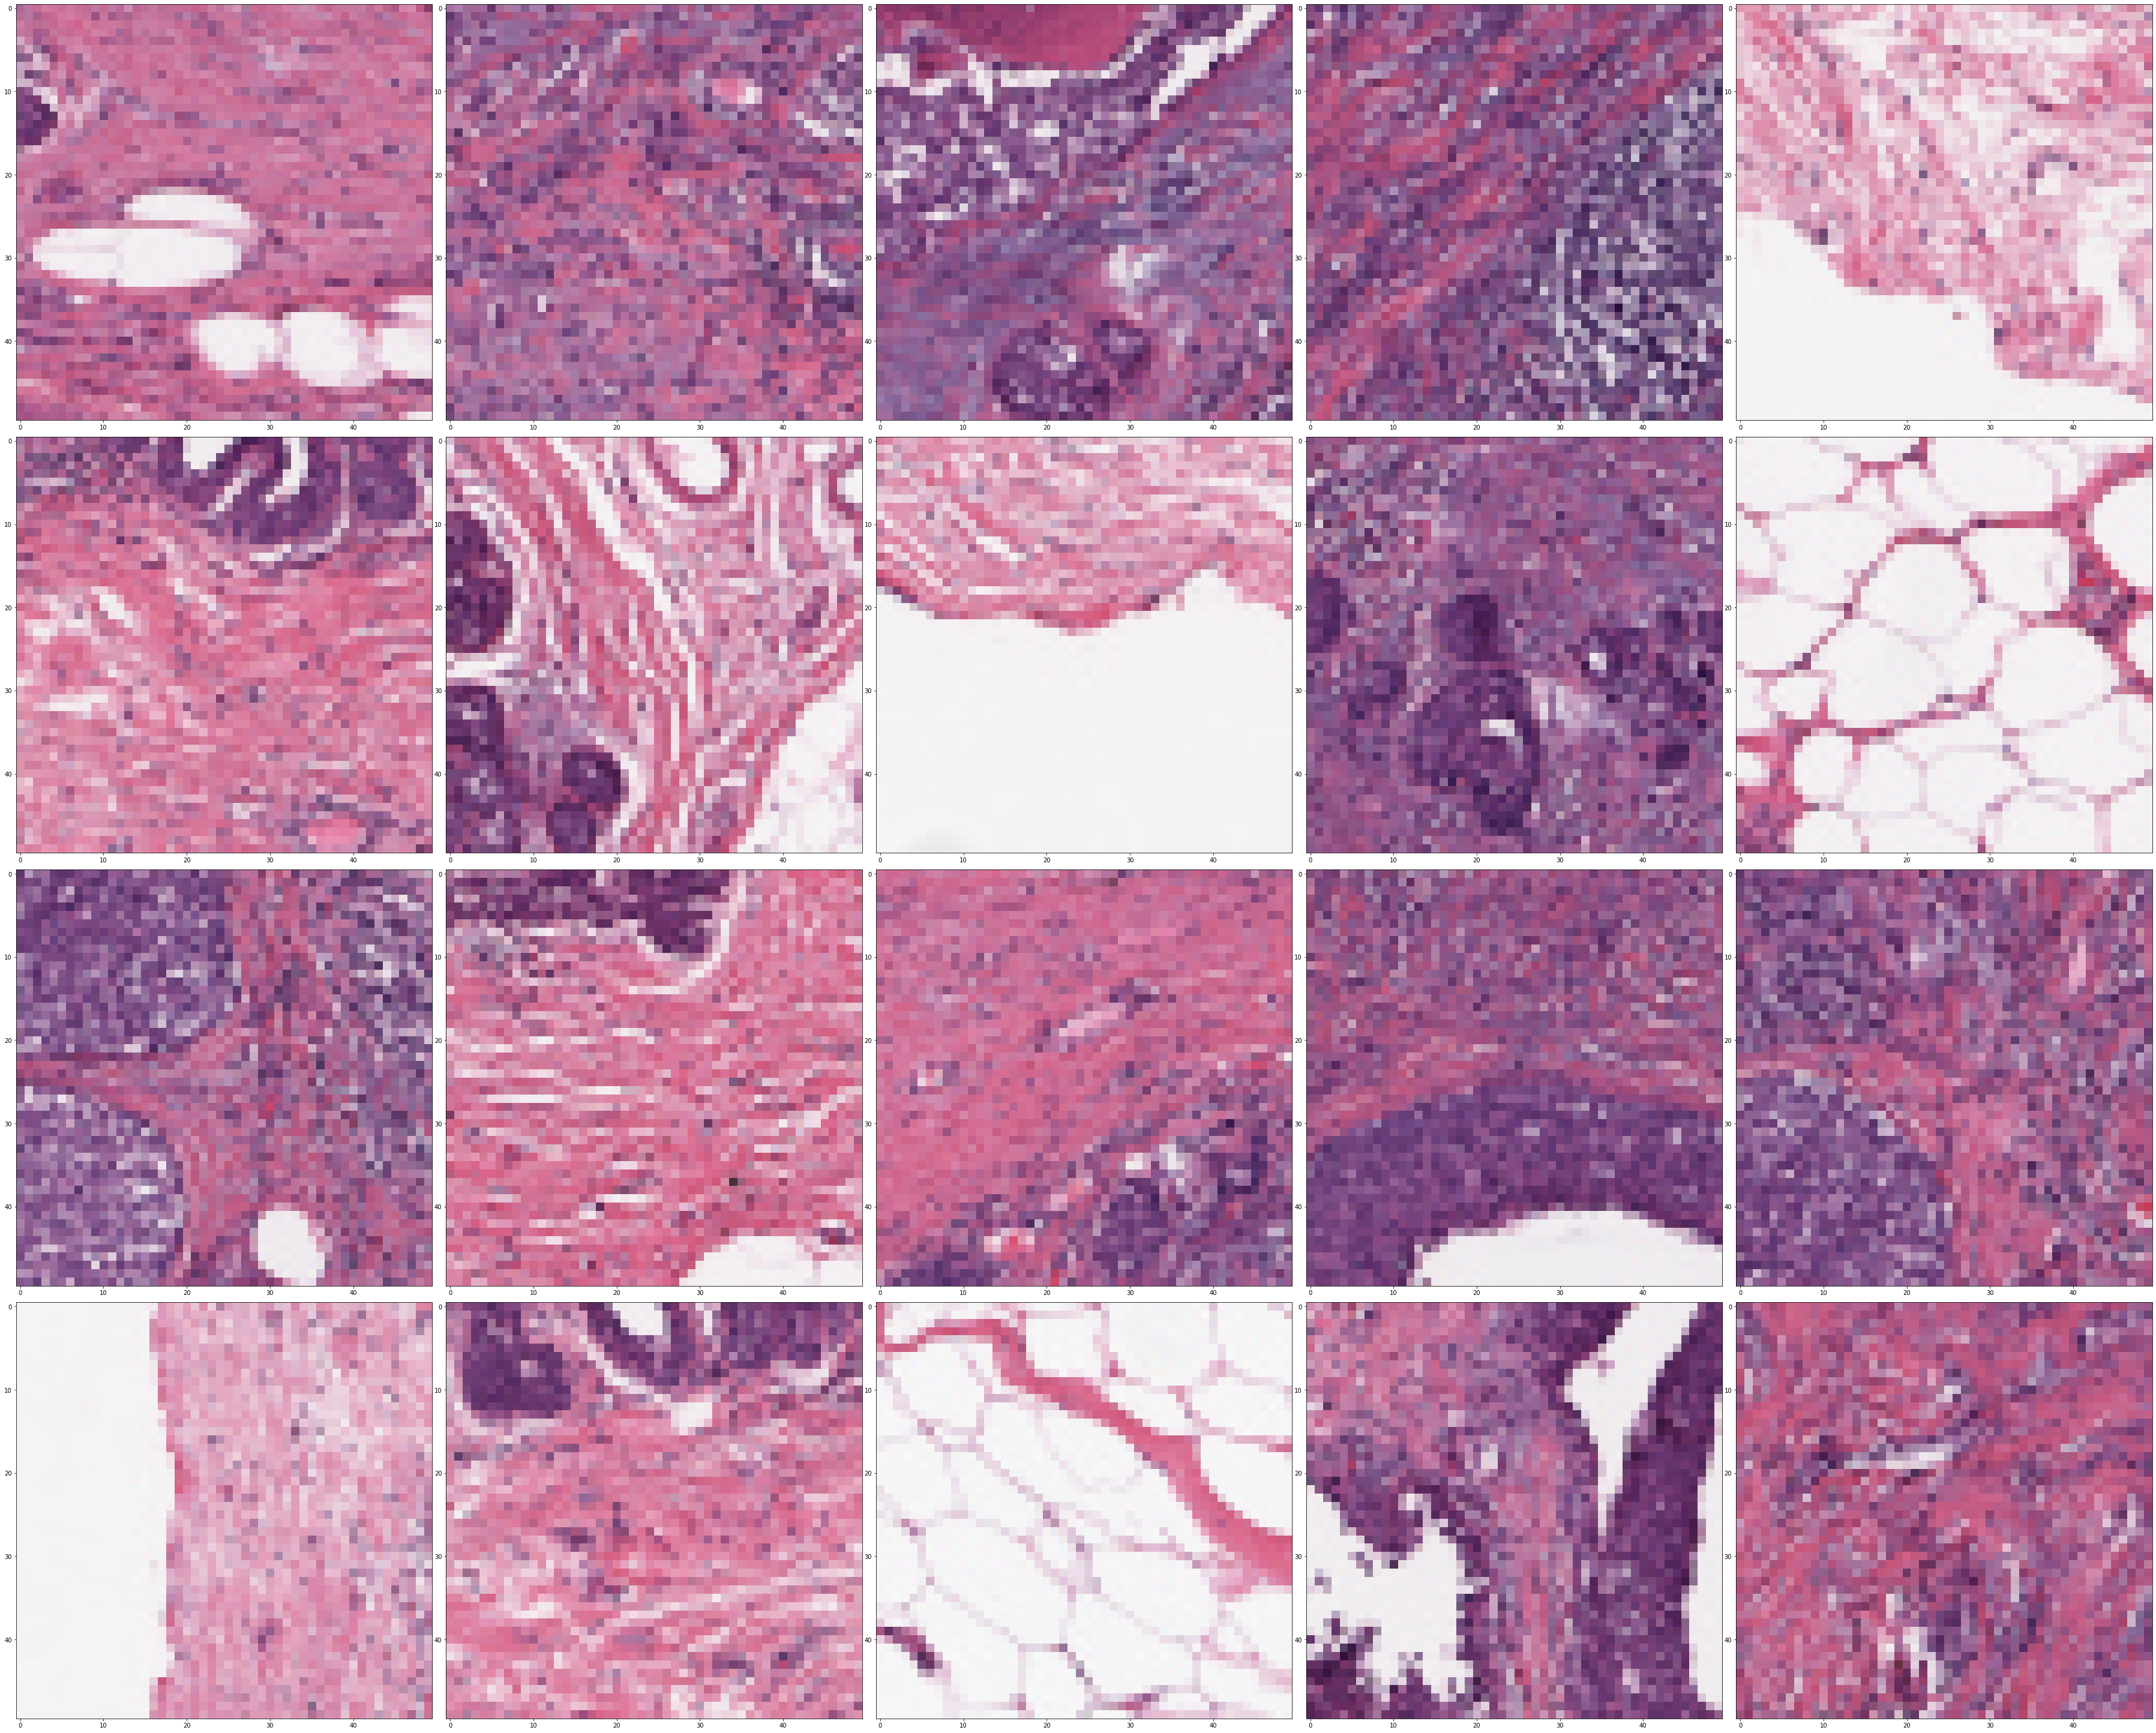

In [ ]:
chemin__ = "/content/drive/MyDrive/DL/data_cancer/train/0"
data_exemple = os.listdir(chemin__)
plt.figure(figsize=(50, 50))

for j in range(20):
    plt.subplot(5, 5, j + 1)
    img = plt.imread(os.path.join(chemin__, data_exemple[j]))
    plt.imshow(img, cmap='gray')
    plt.axis('on')
    
plt.tight_layout()

## Cancer patches (IDC+)

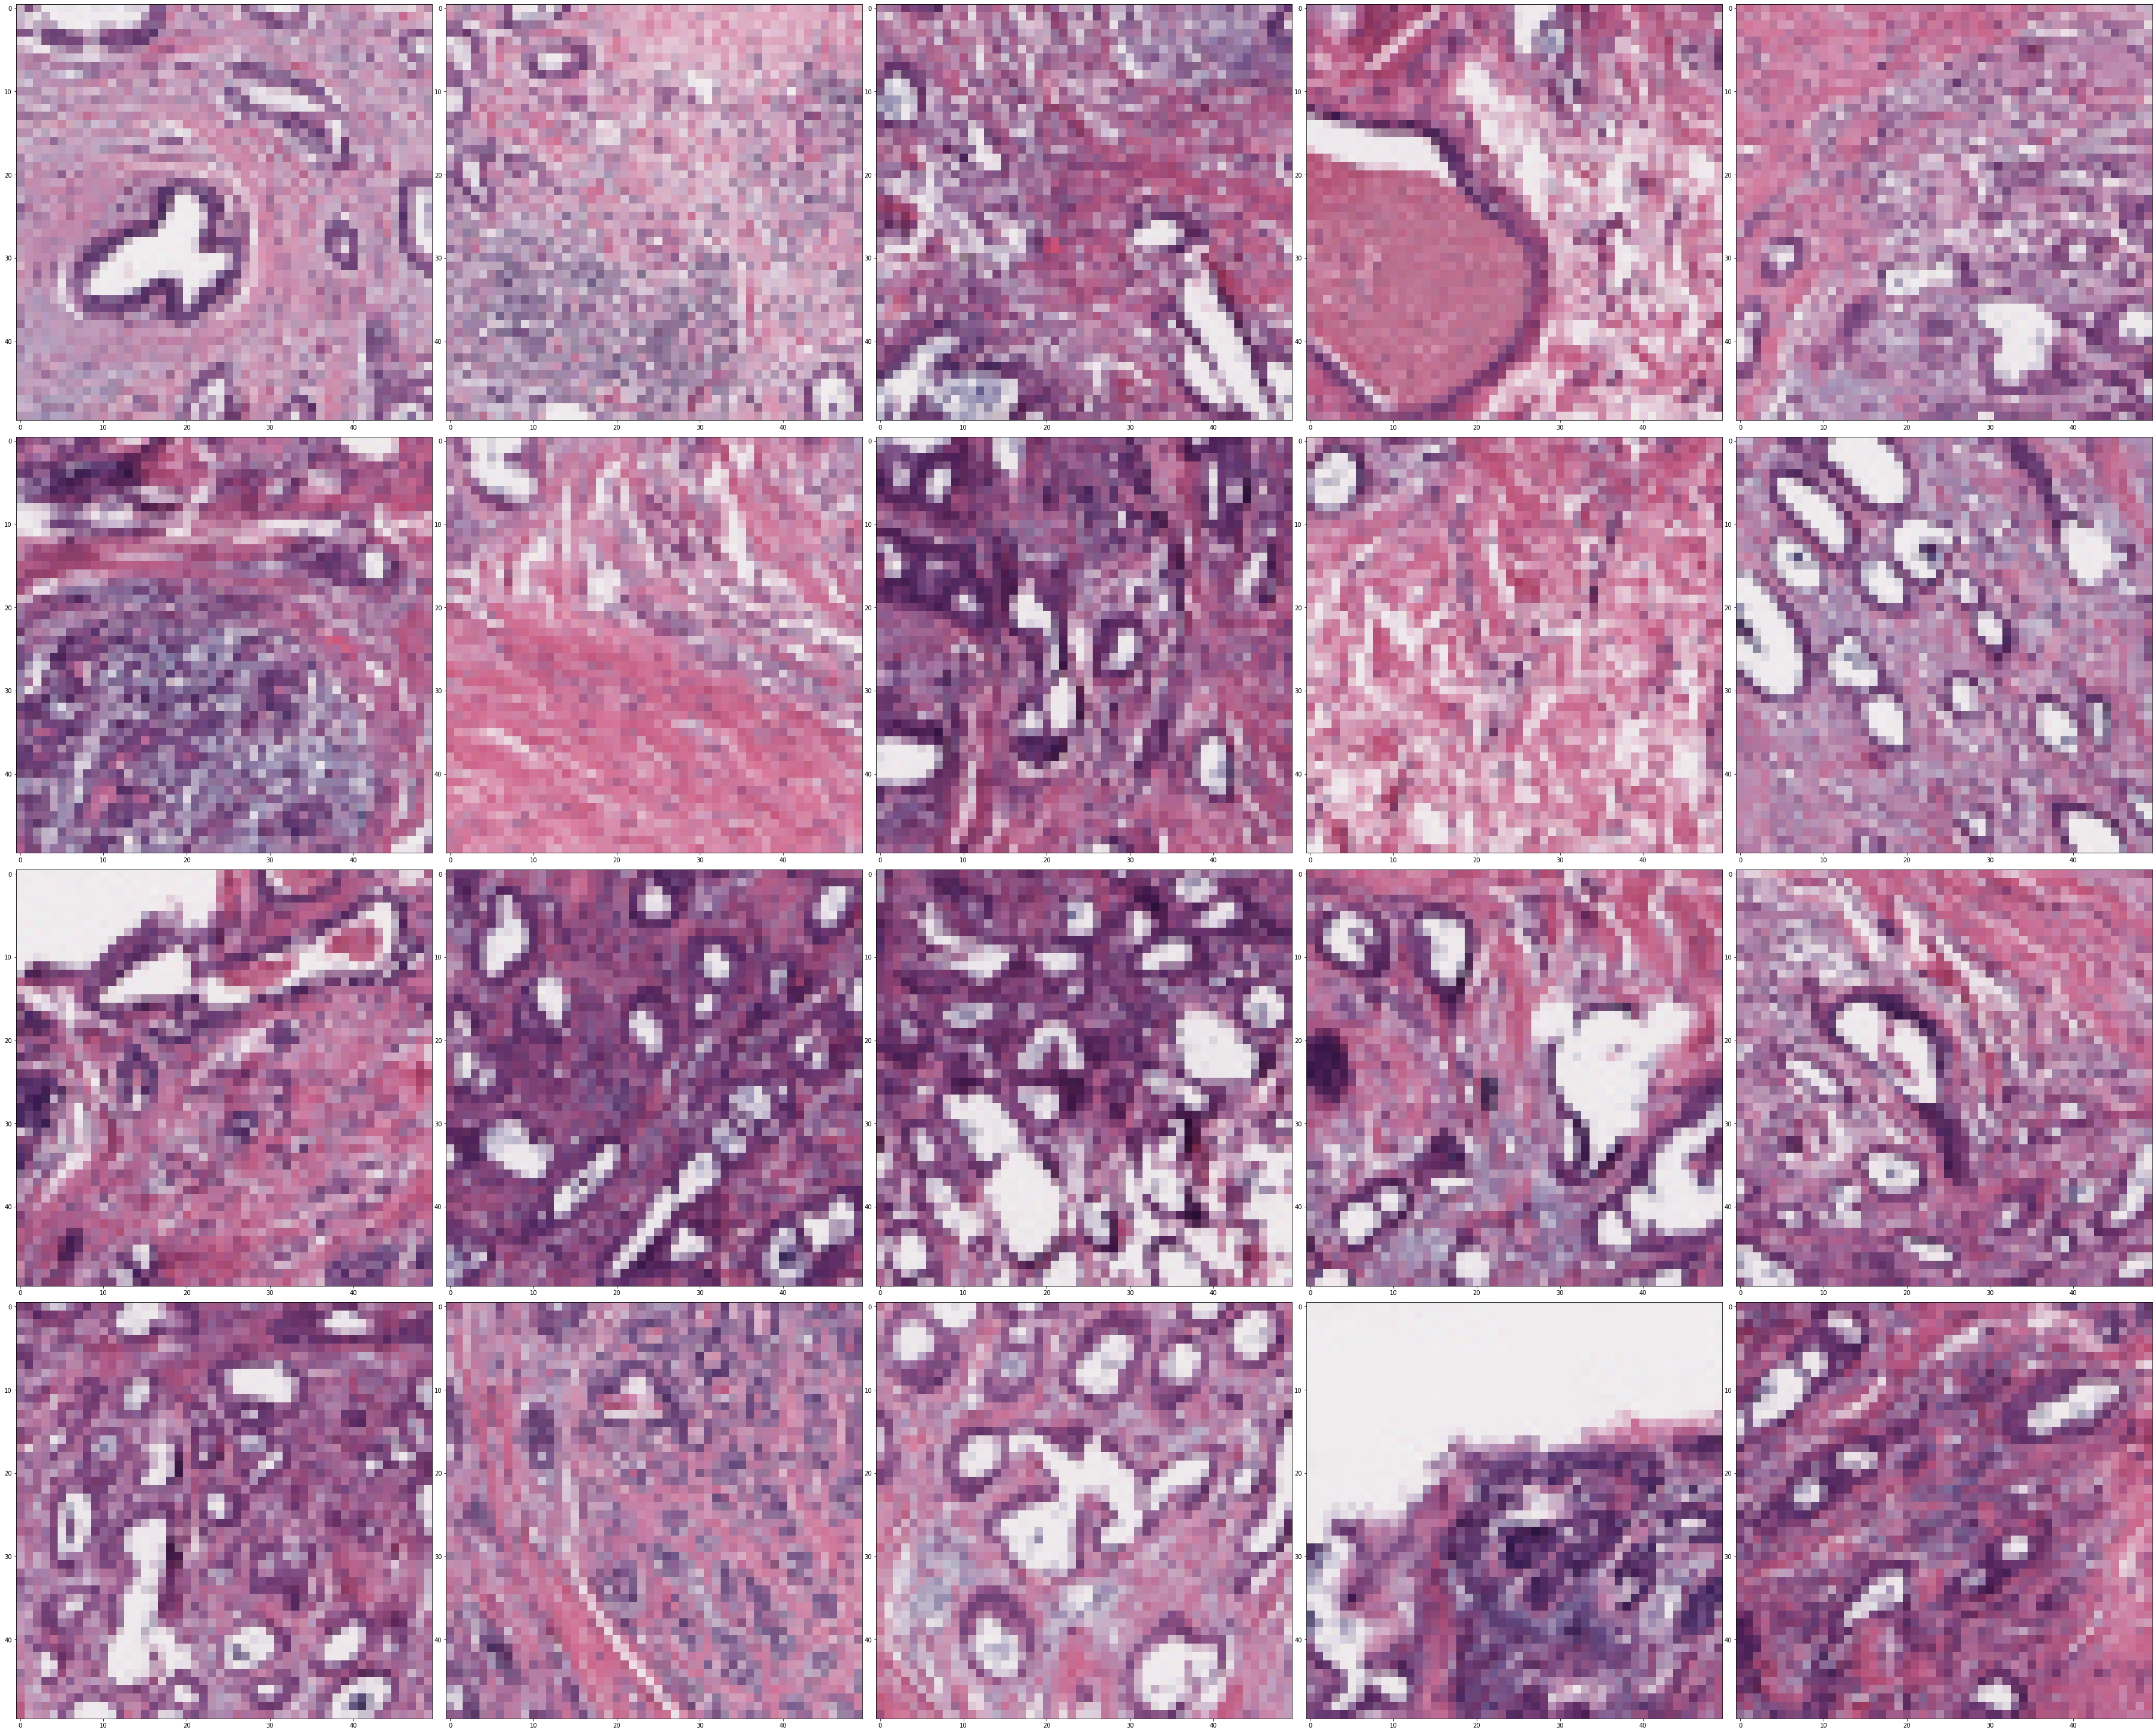

In [ ]:
__chemin__ = "/content/drive/MyDrive/DL/data_cancer/train/1"
data_exemple = os.listdir(__chemin__)
plt.figure(figsize=(50, 50))

for j in range(20):
    plt.subplot(5, 5, j + 1)
    img = plt.imread(os.path.join(__chemin__, data_exemple[j]))
    plt.imshow(img, cmap='gray')
    plt.axis('on')
    
plt.tight_layout()

In [ ]:
#!unrar x /content/drive/MyDrive/DL/data_cancer.rar /content/drive/MyDrive/DL/

# Préparation des données 

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

train_datagen = ImageDataGenerator(
        rescale=1./255,
        width_shift_range=0.3,
        height_shift_range=0.3,
        shear_range=0.2,
        validation_split=0.2,
        fill_mode='nearest'
)

In [ ]:
#
train_generator = train_datagen.flow_from_directory(
        r'/content/drive/MyDrive/DL/data_cancer/train',
        target_size=(50, 50),
        batch_size=64,
        class_mode="binary")
#
validation_generator = test_datagen.flow_from_directory(
        r'/content/drive/MyDrive/DL/data_cancer/validation',
        target_size=(50, 50),
        batch_size=64,
        class_mode="binary")
#
test_generator = test_datagen.flow_from_directory(
        r'/content/drive/MyDrive/DL/data_cancer/test',
        target_size=(50, 50),
        batch_size=64,
        class_mode="binary")

Found 662 images belonging to 2 classes.
Found 185 images belonging to 2 classes.
Found 47 images belonging to 2 classes.


# Transfer learning

## Model VGG16 

In [ ]:
#L'importation du  model VGG16

img_width, img_height = 50,50
conv = vgg16.VGG16 (weights = 'imagenet', include_top = False 
      , pooling = 'max',input_shape = (img_width, img_height, 3)) 
conv.summary()

58892288/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 50, 50, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 50, 50, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 50, 50, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 25, 25, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 25, 25, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 25, 25, 128)       147584    
______________________________________________________________

## Construction du modele

In [ ]:
#Figer le modèle de base(Freeze)La construction du modele
for layer in conv.layers:
    layer.trainable=False

# Ajout de quelques nouvelles couches et fonction d'activation 
# Ajout qlq  dropout 

Add = conv.output
Add = Flatten()(Add)

Add = Dense(1024, activation="relu")(Add)
Add = Dropout(0.6)(Add)

Add = Dense(512, activation="relu")(Add)
Add = Dropout(0.45)(Add)

Add = Dense(256, activation="relu")(Add)
Add = Dense(512, activation="relu")(Add)
Add = Dropout(0.25)(Add)

Add = Dense(1, activation="sigmoid")(Add)
model = Model(conv.input, Add)


In [ ]:
model.summary()
#conv.summary()


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 50, 50, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 50, 50, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 50, 50, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 25, 25, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 25, 25, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 25, 25, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 12, 12, 128)       0     

In [ ]:
#xxxxxx
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
#xxxxxx
batch_size =64
epoch_s=10
history=model.fit(
        train_generator,
        steps_per_epoch=int(np.ceil(train_generator.n / float(batch_size))),
        epochs=epoch_s,
        validation_data=validation_generator,
        validation_steps=int(np.ceil(validation_generator.n / float(batch_size))))



Epoch 1/10
11/11 [==============================] - 153s 13s/step - loss: 0.7295 - accuracy: 0.5206 - val_loss: 0.7118 - val_accuracy: 0.4378
Epoch 2/10
11/11 [==============================] - 2s 164ms/step - loss: 0.6577 - accuracy: 0.6156 - val_loss: 0.6322 - val_accuracy: 0.6324
Epoch 3/10
11/11 [==============================] - 2s 162ms/step - loss: 0.6408 - accuracy: 0.6272 - val_loss: 0.6512 - val_accuracy: 0.6000
Epoch 4/10
11/11 [==============================] - 2s 165ms/step - loss: 0.6116 - accuracy: 0.6240 - val_loss: 0.6881 - val_accuracy: 0.5946
Epoch 5/10
11/11 [==============================] - 2s 162ms/step - loss: 0.5751 - accuracy: 0.6847 - val_loss: 0.7356 - val_accuracy: 0.5838
Epoch 6/10
11/11 [==============================] - 2s 156ms/step - loss: 0.5522 - accuracy: 0.6896 - val_loss: 0.6974 - val_accuracy: 0.5892
Epoch 7/10
11/11 [==============================] - 2s 152ms/step - loss: 0.5329 - accuracy: 0.7267 - val_loss: 0.7415 - val_accuracy: 0.6054
Epoch 

## Évaluation des performances du modèle

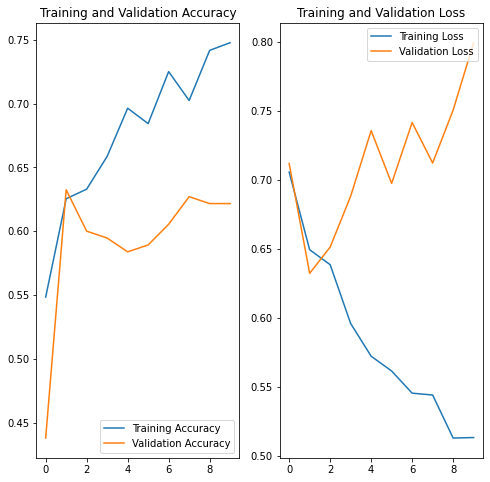

In [ ]:
model.save('cancer.h5')

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

# Plot training and validation accuracy per epoch
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# Plot training and validation loss per epoch
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
score = model.evaluate(validation_generator)

3/3 [==============================] - 0s 78ms/step - loss: 0.7994 - accuracy: 0.6216


##Model VGG19

In [ ]:
#L'importation du  model VGG19

img_width, img_height = 50,50
conv = vgg19.VGG19 (weights = 'imagenet', include_top = False 
      , pooling = 'max',input_shape = (img_width, img_height, 3)) 
conv.summary()

80142336/80134624 [==============================] - 0s 0us/step
Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 50, 50, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 50, 50, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 50, 50, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 25, 25, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 25, 25, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 25, 25, 128)       147584    
______________________________________________________________

## Construction du modele

In [ ]:
#Figer le modèle de base(Freeze)
for layer in conv.layers:
    layer.trainable=False

# Ajout de quelques nouvelles couches et fonction d'activation 
# Ajout qlq  dropout 

Add = conv.output
Add = Flatten()(Add)

Add = Dense(1024, activation="relu")(Add)
Add = Dropout(0.6)(Add)

Add = Dense(512, activation="relu")(Add)
Add = Dropout(0.45)(Add)

Add = Dense(256, activation="relu")(Add)
Add = Dense(512, activation="relu")(Add)
Add = Dropout(0.25)(Add)

Add = Dense(1, activation="sigmoid")(Add)
model = Model(conv.input, Add)

In [ ]:
model.summary()


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 50, 50, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 50, 50, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 50, 50, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 25, 25, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 25, 25, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 25, 25, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 12, 12, 128)       0   

In [ ]:
#xxxxxx
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
#xxxxxx
batch_size =64
epoch_s=10
history=model.fit(
        train_generator,
        steps_per_epoch=int(np.ceil(train_generator.n / float(batch_size))),
        epochs=epoch_s,
        validation_data=validation_generator,
        validation_steps=int(np.ceil(validation_generator.n / float(batch_size))))



Epoch 1/10
11/11 [==============================] - 3s 185ms/step - loss: 0.7737 - accuracy: 0.4820 - val_loss: 0.7723 - val_accuracy: 0.4162
Epoch 2/10
11/11 [==============================] - 2s 153ms/step - loss: 0.7005 - accuracy: 0.5458 - val_loss: 0.6812 - val_accuracy: 0.6216
Epoch 3/10
11/11 [==============================] - 2s 153ms/step - loss: 0.6201 - accuracy: 0.6380 - val_loss: 0.6903 - val_accuracy: 0.6054
Epoch 4/10
11/11 [==============================] - 2s 154ms/step - loss: 0.6452 - accuracy: 0.6526 - val_loss: 0.6954 - val_accuracy: 0.5622
Epoch 5/10
11/11 [==============================] - 2s 160ms/step - loss: 0.6099 - accuracy: 0.6609 - val_loss: 0.7275 - val_accuracy: 0.5459
Epoch 6/10
11/11 [==============================] - 2s 153ms/step - loss: 0.5416 - accuracy: 0.7266 - val_loss: 0.7680 - val_accuracy: 0.5351
Epoch 7/10
11/11 [==============================] - 2s 156ms/step - loss: 0.5571 - accuracy: 0.7120 - val_loss: 0.7584 - val_accuracy: 0.5676
Epoch 

### Évaluation des performances du modèle

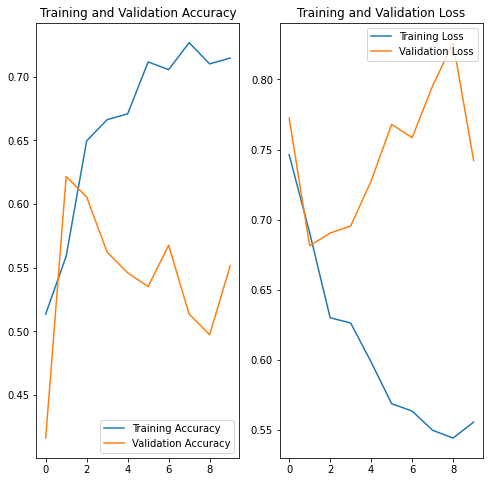

In [ ]:
model.save('cancer.h5')

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

# Plot training and validation accuracy per epoch
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# Plot training and validation loss per epoch
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
score = model.evaluate(validation_generator)

3/3 [==============================] - 0s 88ms/step - loss: 0.7423 - accuracy: 0.5514
